![ecosystems](ecosystems.png)

As more animals face endangerment, understanding environmental impacts is key. Conservation groups analyze habitat and survival data to identify beneficial or harmful patterns. This helps target efforts like habitat restoration or policy changes. If certain environments prove better for wildlife, efforts are concentrated there. Acting as a conservation data scientist, you'll leverage data to inform conservation decisions by identifying the area where these efforts are needed most urgently.

This project is about both factor analysis and survival analysis. Factor analysis is useful in market research to identify underlying customer preferences, in human resources to understand employee satisfaction drivers, and in finance to assess investment risks by identifying underlying factors. Survival analysis is applied in real-life business contexts like customer churn prediction, analyzing the lifespan of products in the market, and estimating the time to failure for machinery in manufacturing settings.

The `factor_data.csv` and `survival_data.csv` files encompass vital information for analyzing how environmental factors influence wildlife populations. 

`factor_data.csv` includes metrics on environmental and biological variables across various habitats:

| Variable            | Description                                     |
|---------------------|-------------------------------------------------|
| `AirQuality`        | Index of air quality in the habitat             |
| `Temperature`       | Scaled average temperature in the habitat              |
| `DeforestationRate` | Scaled rate of deforestation in the area               |
| `SpeciesDiversity`  | Average number of different species in the habitat      |
| `ReproductiveRates` | Scaled average reproductive rates of species in habitat|

`survival_data.csv` contains survival details of individual animals or populations, linking back to the environmental conditions:

| Variable       | Description                                             |
|----------------|---------------------------------------------------------|
| `Survival_Time` | Time until the event (death) occurs                     |
| `Censuring_Status`       | Event observed (1) or censored (0)        |
| `Habitat`       | Five different types of wildlife habitats       |

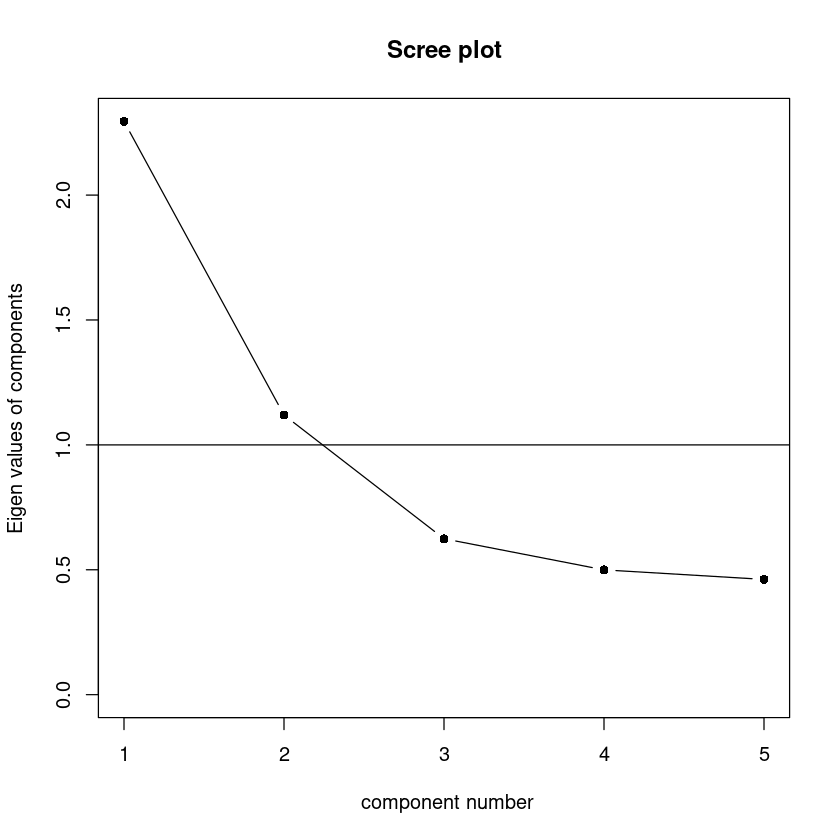

Most impactful factor: DeforestationRate 
Number of factors: 2 
Habitat with lowest survival probability at ~400: Savanna 


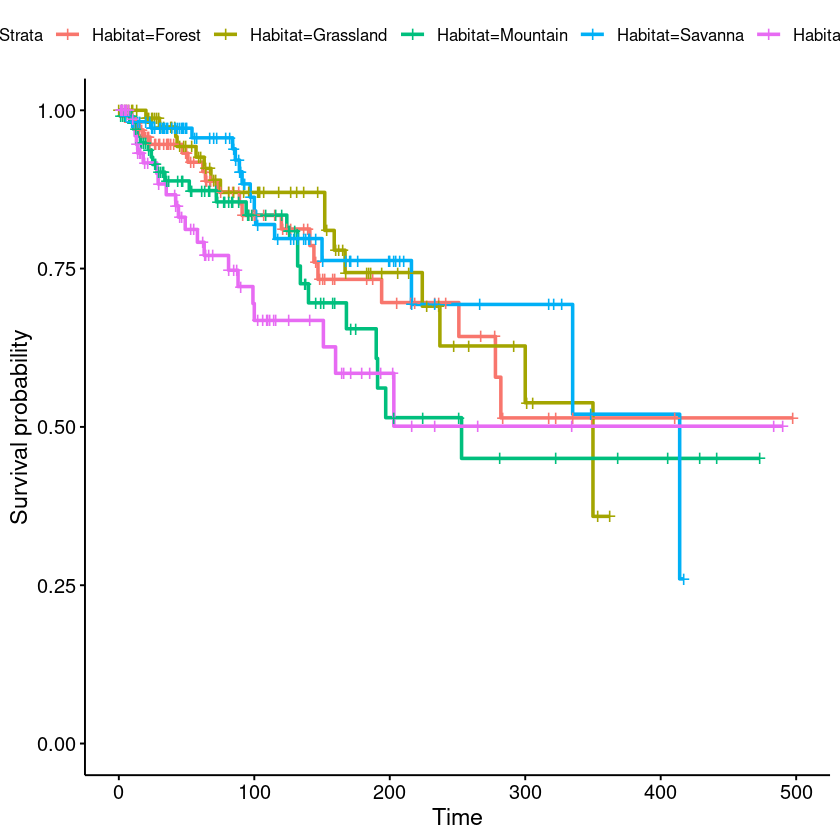

In [49]:
# Import required packages
library(psych)
library(survival)
library(survminer)
library(readr)
library(broom)
library(GPArotation)
library(dplyr)  # Added dplyr for ungroup function

# Load the factor_data.csv
factor_data <- read_csv("factor_data.csv", show_col_types = FALSE)

# Load the survival_data.csv
survival_data <- read_csv("survival_data.csv", show_col_types = FALSE)

# 1. Find the strongest correlation to SpeciesDiversity
cor_factor_data <- cor(factor_data, use = "pairwise.complete.obs")
cor_species <- cor_factor_data["SpeciesDiversity", ]
cor_species <- cor_species[names(cor_species) != "SpeciesDiversity"]
most_impactful_factor <- names(which.max(abs(cor_species)))

# 2. Perform Exploratory Factor Analysis
scree(cor_factor_data, factors = FALSE)
num_factors <- 2
EFA_model <- fa(factor_data, nfactors = num_factors)

# 3. Perform Survival Analysis
survival_fit <- survfit(Surv(Survival_Time, Censoring_Status) ~ Habitat, data = survival_data)
survival_fit_df <- tidy(survival_fit)

# Find the time point closest to 400
time_target <- 400
survival_fit_df$Habitat <- gsub("Habitat=", "", survival_fit_df$strata)
survival_fit_df$time_diff <- abs(survival_fit_df$time - time_target)
closest_times <- survival_fit_df %>%
  group_by(Habitat) %>%
  filter(time_diff == min(time_diff)) %>%
  ungroup()  # Corrected the error by adding dplyr library

# Find the habitat with the lowest survival probability at time ~400
low_surv_row <- closest_times[which.min(closest_times$estimate), ]
low_surv_habitat <- as.character(low_surv_row$Habitat)

# Plot survival curves
ggsurvplot(survival_fit, data = survival_data)

# Output the key results
cat("Most impactful factor:", most_impactful_factor, "\n")
cat("Number of factors:", num_factors, "\n")
cat("Habitat with lowest survival probability at ~400:", low_surv_habitat, "\n")